    ##Problema de negocio: Turnover

   A Empresa ABC Entreprise, possui um problema relacionado a rotatividade de colaboradores. A rotarividade, ou, turnover é um problema grave, e que indica que a empresa, além de poder estar perdendo mão de obra qualificada, possui ainda custos altos com demissões e recon-
   tratações.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Human_Resources.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull() .sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df['Age'].mean()

36.923809523809524

In [7]:
print(df['Age'].min())
print(df['Age'].max())

18
60


In [8]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [9]:
#Usando uma função lambda para alterar valores nas colunas selecionadas
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bc234d090>,
      dtype=object)

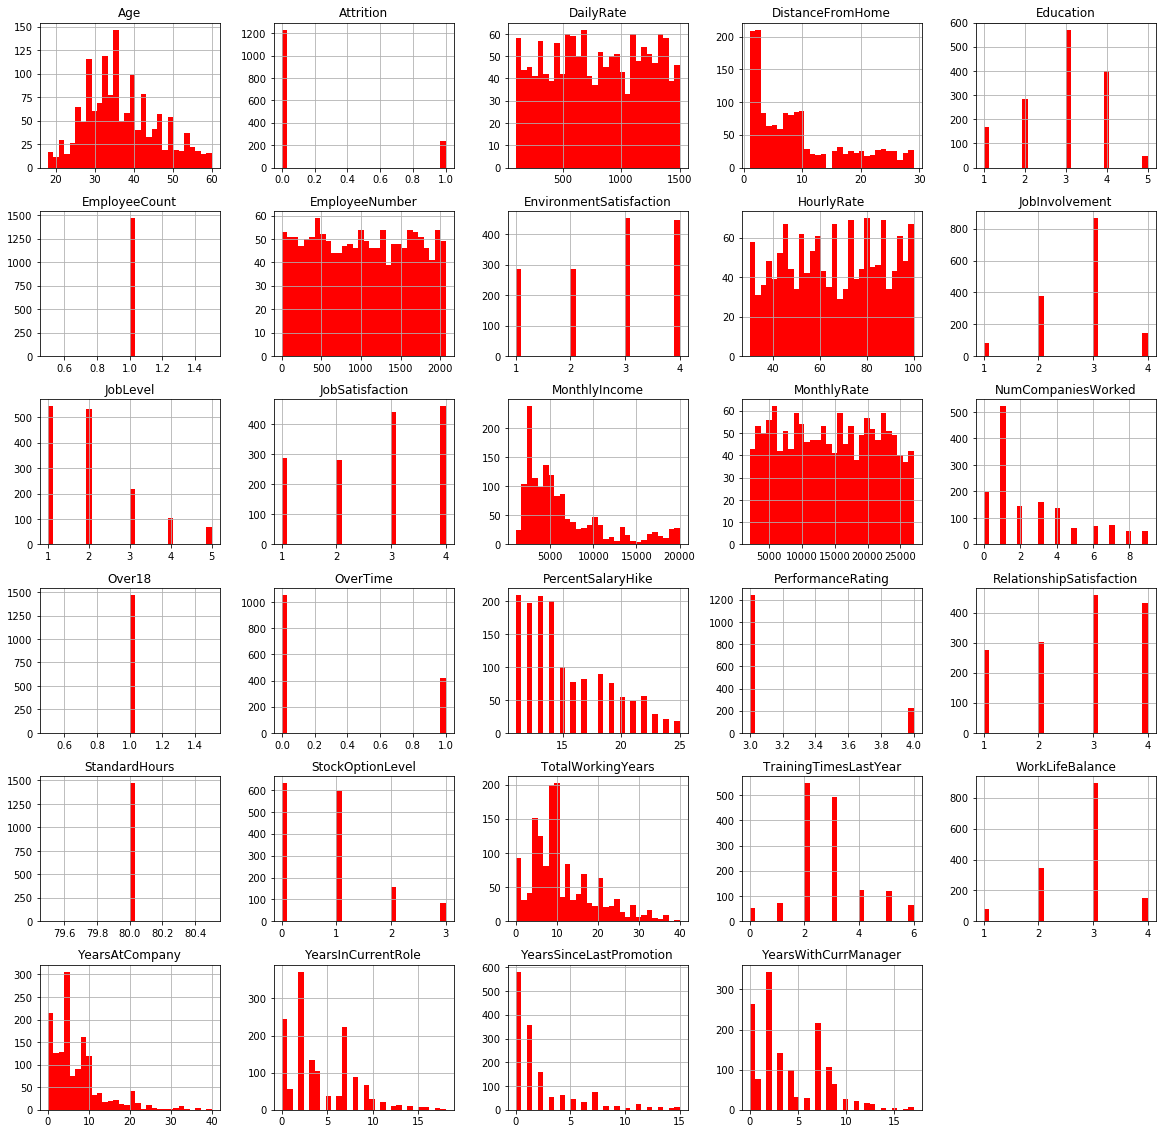

In [10]:
#Plotando um histograma com 30 faixas
df.hist(bins= 30, figsize=(20,20), color='r')

In [11]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

In [12]:
#Separando o dataframe em colaboradores que saíram e que não sairam
left_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]

In [13]:
print('Total = ', len(df))
print('numero de funcionários que saíram da empresa = ', len(left_df))
print('porcentagem de funcionários que saíram da empresa', (len(left_df) / len(df)) * 100)
print('numero de funcionários que ficaram da empresa = ', len(stayed_df))
print('porcentagem de funcionários que saíram da empresa', (len(stayed_df) / len(df)) *100)

Total =  1470
numero de funcionários que saíram da empresa =  237
porcentagem de funcionários que saíram da empresa 16.122448979591837
numero de funcionários que ficaram da empresa =  1233
porcentagem de funcionários que saíram da empresa 83.87755102040816


In [14]:
left_df.describe() .round(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.00000,237.00000,237.00000,237.00000,237.00000,237.00000,237.00000,237.00000,237.00000,237.00000,...,237.00000,237.00000,237.00000,237.00000,237.00000,237.00000,237.00000,237.00000,237.00000,237.00000
mean,33.61000,1.00000,750.36000,10.63000,2.84000,2.46000,65.57000,2.52000,1.64000,2.47000,...,3.16000,2.60000,0.53000,8.24000,2.62000,2.66000,5.13000,2.90000,1.95000,2.85000
std,9.69000,0.00000,401.90000,8.45000,1.01000,1.17000,20.10000,0.77000,0.94000,1.12000,...,0.36000,1.13000,0.86000,7.17000,1.25000,0.82000,5.95000,3.17000,3.15000,3.14000
min,18.00000,1.00000,103.00000,1.00000,1.00000,1.00000,31.00000,1.00000,1.00000,1.00000,...,3.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,28.00000,1.00000,408.00000,3.00000,2.00000,1.00000,50.00000,2.00000,1.00000,1.00000,...,3.00000,2.00000,0.00000,3.00000,2.00000,2.00000,1.00000,0.00000,0.00000,0.00000
50%,32.00000,1.00000,699.00000,9.00000,3.00000,3.00000,66.00000,3.00000,1.00000,3.00000,...,3.00000,3.00000,0.00000,7.00000,2.00000,3.00000,3.00000,2.00000,1.00000,2.00000
75%,39.00000,1.00000,1092.00000,17.00000,4.00000,4.00000,84.00000,3.00000,2.00000,3.00000,...,3.00000,4.00000,1.00000,10.00000,3.00000,3.00000,7.00000,4.00000,2.00000,5.00000
max,58.00000,1.00000,1496.00000,29.00000,5.00000,4.00000,100.00000,4.00000,5.00000,4.00000,...,4.00000,4.00000,3.00000,40.00000,6.00000,4.00000,40.00000,15.00000,15.00000,14.00000


In [15]:
stayed_df.describe() .round(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000,...,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000,1233.00000
mean,37.56000,0.00000,812.50000,8.92000,2.93000,2.77000,65.95000,2.77000,2.15000,2.78000,...,3.15000,2.73000,0.85000,11.86000,2.83000,2.78000,7.37000,4.48000,2.23000,4.37000
std,8.89000,0.00000,403.21000,8.01000,1.03000,1.07000,20.38000,0.69000,1.12000,1.09000,...,0.36000,1.07000,0.84000,7.76000,1.29000,0.68000,6.10000,3.65000,3.23000,3.59000
min,18.00000,0.00000,102.00000,1.00000,1.00000,1.00000,30.00000,1.00000,1.00000,1.00000,...,3.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,31.00000,0.00000,477.00000,2.00000,2.00000,2.00000,48.00000,2.00000,1.00000,2.00000,...,3.00000,2.00000,0.00000,6.00000,2.00000,2.00000,3.00000,2.00000,0.00000,2.00000
50%,36.00000,0.00000,817.00000,7.00000,3.00000,3.00000,66.00000,3.00000,2.00000,3.00000,...,3.00000,3.00000,1.00000,10.00000,3.00000,3.00000,6.00000,3.00000,1.00000,3.00000
75%,43.00000,0.00000,1176.00000,13.00000,4.00000,4.00000,83.00000,3.00000,3.00000,4.00000,...,3.00000,4.00000,1.00000,16.00000,3.00000,3.00000,10.00000,7.00000,3.00000,7.00000
max,60.00000,0.00000,1499.00000,29.00000,5.00000,4.00000,100.00000,4.00000,5.00000,4.00000,...,4.00000,4.00000,3.00000,38.00000,6.00000,4.00000,37.00000,18.00000,15.00000,17.00000


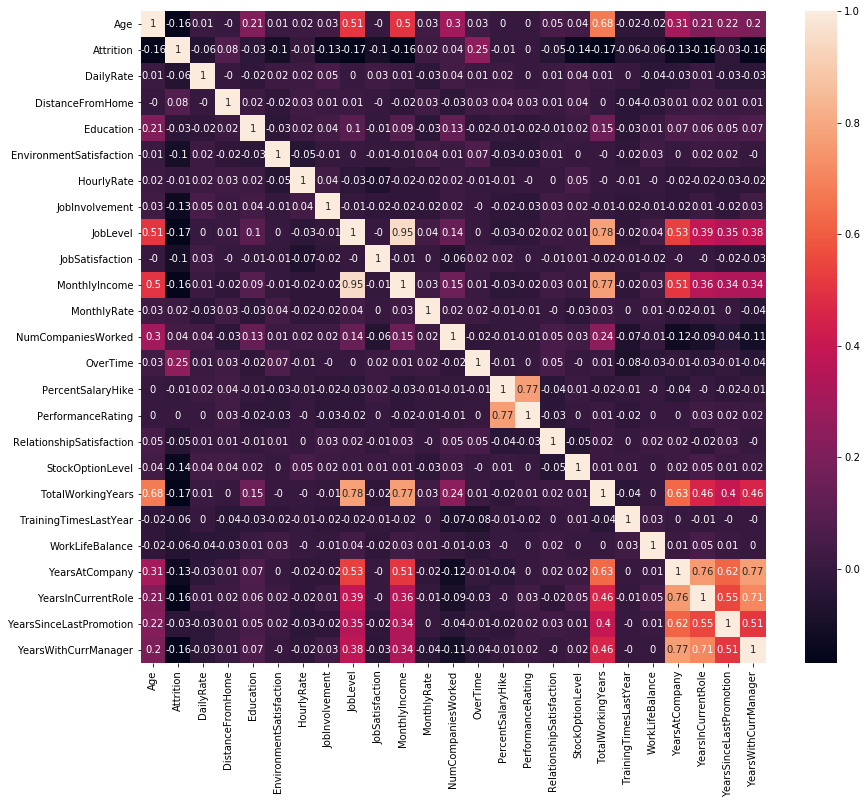

In [16]:
correlacoes = df.corr() .round(2)
f, ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlacoes, annot=True)

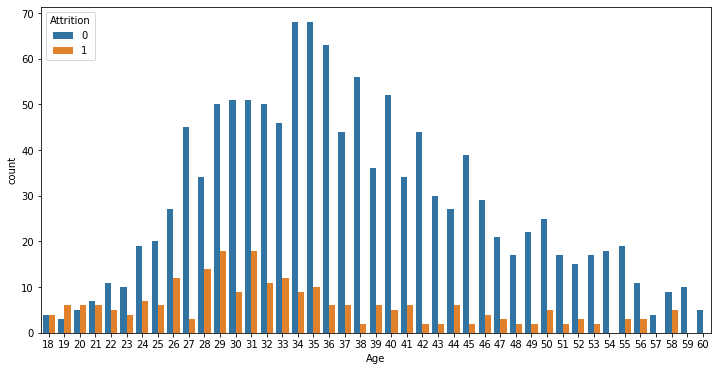

In [17]:
plt.figure(figsize=[12,6])
sns.countplot(x = 'Age', hue='Attrition', data=df);

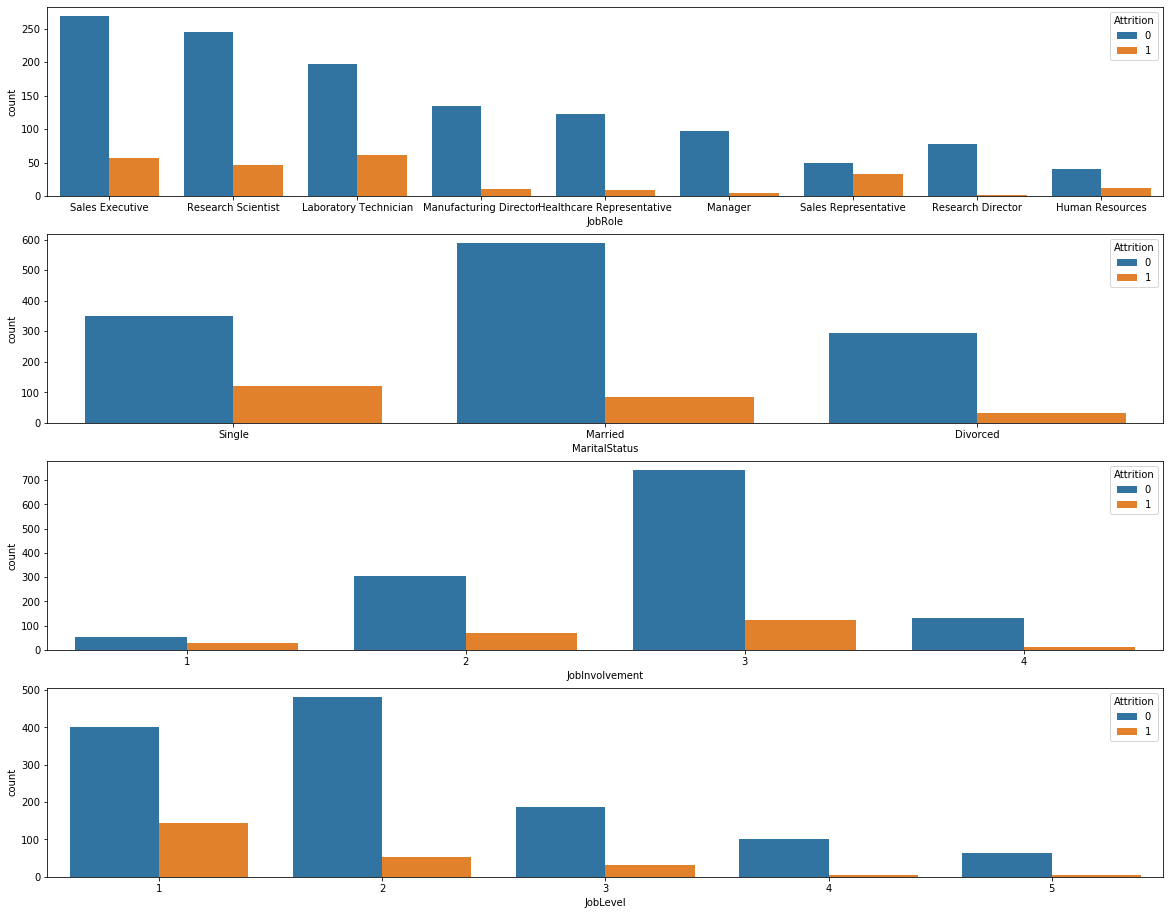

In [18]:
plt.figure(figsize=[20,16])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)

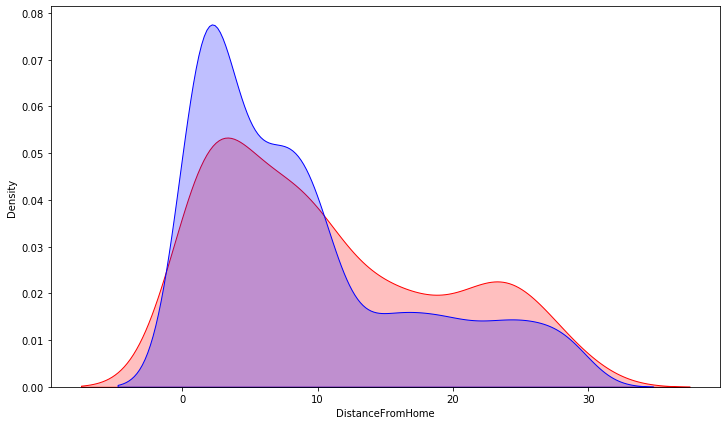

In [19]:
#implementando KDE(Kernel Density estimate)
plt.figure(figsize=[12,7])
sns.kdeplot(left_df['DistanceFromHome'], label= 'Funcionários que saíram', shade=True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label= 'Funcionários que ficaram', shade=True, color = 'b')

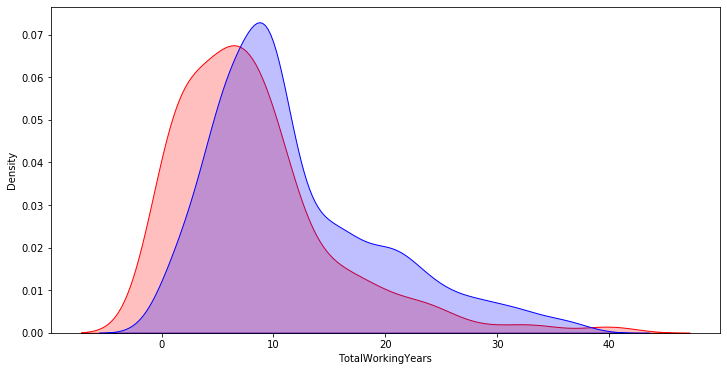

In [20]:
plt.figure(figsize=[12,6])
sns.kdeplot(left_df['TotalWorkingYears'], label= 'Funcionários que saíram', shade=True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label= 'Funcionários que ficaram', shade=True, color = 'b')

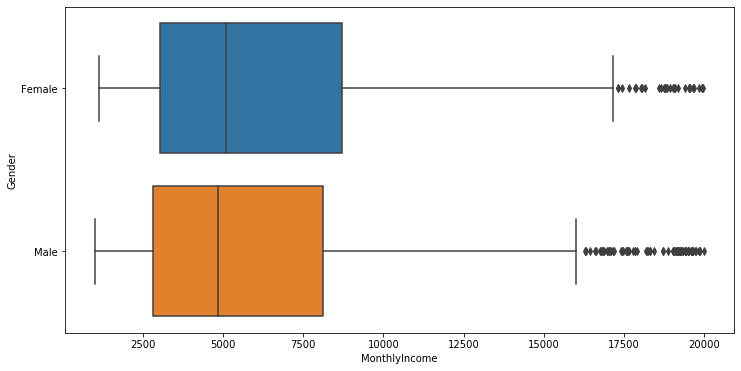

In [21]:
plt.figure(figsize=[12,6])
sns.boxplot(x='MonthlyIncome', y='Gender', data=df)

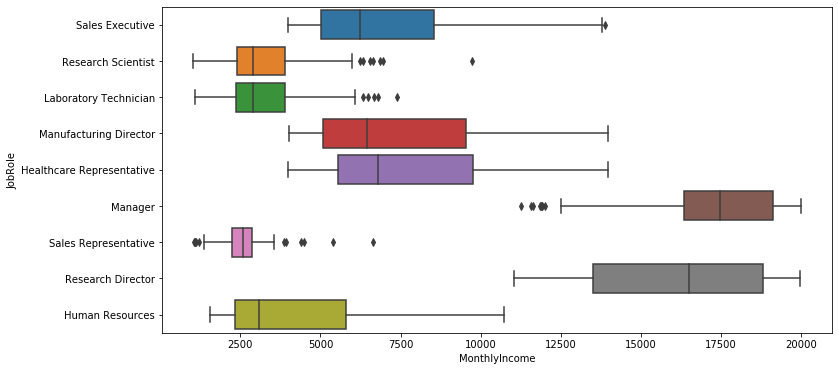

In [22]:
#Analisando os salários por departamento
plt.figure(figsize=[12,6])
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=df)

In [23]:
#Definindo as variáveis categoricas
x_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [24]:
#Criando variaveis do tipo dummy

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to re

In [25]:
#Transformando em dataframe
x_cat = pd.DataFrame(x_cat)

In [26]:
#Definindo as variáveis continuas
x_numerical = df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]


In [27]:
x_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1466,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1467,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1468,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000


In [28]:
# concatenando os dataframes numericos e categoricos
result = pd.concat([x_cat, x_numerical], axis=1)

In [29]:
result

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,...,3,1,0,8,0,1,6,4,0,5
1,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,4,4,1,10,3,3,10,7,1,7
2,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3,2,0,7,3,3,0,0,0,0
3,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,3,3,0,8,3,3,8,7,3,0
4,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,3,3,1,17,3,3,5,2,0,3
1466,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,3,1,1,9,5,3,7,7,1,7
1467,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,4,2,1,6,0,3,6,2,0,3
1468,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,...,3,4,0,17,3,2,9,6,0,8


#O dataframe possui muitos valores 0 e 1, enquanto outros atributos possuem valores bem mais altos

#para que o algoritimo não entenda um atributo como mais importante que outro, aplicaremos uma normalização

In [30]:
#normalizando uma base de dados

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(result)

In [31]:
#Definindo a variável resposta
y = df['Attrition']

In [32]:
#Dividindo o dataframe em teste e treino

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [33]:
#importando o modelo de regressão logistica
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [34]:
#Incluindo dados de treino. 
logistic.fit(x_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
#Base de teste, deve ser executada após a base de treino
y_pred = logistic.predict(x_test)
y_pred

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [36]:
#Importanto métricas para analisar os resultados do modelo
from sklearn.metrics import accuracy_score

In [37]:
# Faz a comparação entre base de treino e base de testes, para verificar a acuracia do modelo
accuracy_score(y_test, y_pred)

0.8831521739130435

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[302,   6],
       [ 37,  23]])

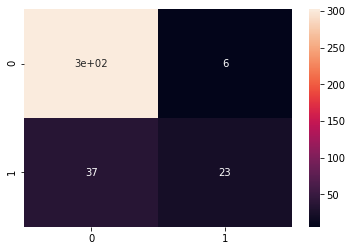

In [41]:
sns.heatmap(cm, annot=True)

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [43]:
logistic_precision = precision_score(y_test, y_pred)

In [44]:
logistic_recall = recall_score(y_test, y_pred)

In [45]:
logistic_f1 = f1_score(y_test, y_pred, average='macro')

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       308
           1       0.79      0.38      0.52        60

    accuracy                           0.88       368
   macro avg       0.84      0.68      0.73       368
weighted avg       0.87      0.88      0.87       368



In [47]:
result_logistic1 = pd.DataFrame([logistic_precision])
result_logistic2 = pd.DataFrame([logistic_recall])
result_logistic3 = pd.DataFrame([logistic_f1])

In [48]:
result_logistic = pd.concat([result_logistic1, result_logistic2,result_logistic3 ])

In [49]:
result_logistic

,0
0,0.79310
0,0.38333
0,0.72520


In [50]:
from sklearn.ensemble import RandomForestClassifier

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import pred

In [51]:
forest = RandomForestClassifier()

In [52]:
forest.fit(x_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_pred = forest.predict(x_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       360
           1       0.10      0.75      0.18         8

    accuracy                           0.85       368
   macro avg       0.55      0.80      0.55       368
weighted avg       0.97      0.85      0.90       368



In [55]:
import tensorflow as tf

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [56]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [57]:
rede_neural.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [58]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [59]:
rede_neural.fit(x_train, y_train, epochs= 200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
1102/1102 [==============================] - 0s 349us/sample - loss: 0.5000 - acc: 0.8358
Epoch 2/200
1102/1102 [==============================] - 0s 184us/sample - loss: 0.4007 - acc: 0.8394
Epoch 3/200
1102/1102 [==============================] - 0s 176us/sample - loss: 0.3863 - acc: 0.8394
Epoch 4/200
1102/1102 [==============================] - 0s 185us/sample - loss: 0.3724 - acc: 0.8394
Epoch 5/200
1102/1102 [==============================] - 0s 182us/sample - loss: 0.3536 - acc: 0.8430
Epoch 6/200
1102/1102 [==============================] - 0s 126us/sample - loss: 0.3354 - acc: 0.8621
Epoch 7/200
1102/1102 [==============================] - 0s 122us/sample - loss: 0.3238 - acc: 0.8748
Epoch 8/200
1102/1102 [==============================] - 0s 174us/sample - loss: 0.3140 - acc: 0.8820
Epoch 9/200
1102/1102 [==============================] - 0s 180us/sample - loss: 0.3038 - acc: 0.8866
Epoch 10/200
1102/1102 [==========

In [60]:
y_pred = rede_neural.predict(x_test)

In [61]:
y_pred = (y_pred >= 0.5)

In [62]:
cm = confusion_matrix(y_pred, y_test)

In [63]:
cm

array([[281,  35],
       [ 27,  25]])

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       308
           1       0.48      0.42      0.45        60

    accuracy                           0.83       368
   macro avg       0.69      0.66      0.67       368
weighted avg       0.82      0.83      0.83       368



#Salvando o Classificador#

In [65]:
import pickle

In [66]:
with open('variaveis_modelo.pkl', 'wb') as f:
    pickle.dump([scaler, onehotencoder, logistic], f)

In [67]:
with open('variaveis_modelo.pkl', 'rb') as f:
    min_max, encoder, modelo = pickle.load(f)

In [68]:
min_max, encoder, modelo

(MinMaxScaler(copy=True, feature_range=(0, 1)),
 OneHotEncoder(categorical_features=None, categories=None, drop=None,
               dtype=<class 'numpy.float64'>, handle_unknown='error',
               n_values=None, sparse=True),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False))

In [69]:
x_novo = df.iloc[0:1]
x_novo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


In [70]:
x_cat_novo = x_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]


In [71]:
x_cat_novo = encoder.transform(x_cat_novo).toarray()
x_cat_novo

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in Num

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [72]:
x_cat_novo = pd.DataFrame(x_cat_novo)
x_cat_novo

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000


In [73]:
x_numerical_novo = x_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
x_numerical_novo = pd.DataFrame(x_numerical_novo)

In [74]:
x_all_novo = pd.concat([x_cat_novo, x_numerical_novo], axis = 1)

In [75]:
x_all_novo = min_max.transform(x_all_novo)

In [79]:
modelo.predict(x_all_novo)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([1])

In [80]:
modelo.predict_proba(x_all_novo)

array([[0.38849856, 0.61150144]])